<a href="https://colab.research.google.com/github/CSEK19/prob-stat/blob/main/GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Tran Tien Phat \\
File:   GPU.ipynb\
Target: Convert object data  to float data

# Import data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('drive/MyDrive/Data/XSTK/All_GPUs.csv')

# Data discovery


In [ ]:
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3406 entries, 0 to 3405
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Architecture            3344 non-null   object 
 1   Best_Resolution         2764 non-null   object 
 2   Boost_Clock             1446 non-null   object 
 3   Core_Speed              3406 non-null   object 
 4   DVI_Connection          2656 non-null   float64
 5   Dedicated               3392 non-null   object 
 6   Direct_X                3400 non-null   object 
 7   DisplayPort_Connection  857 non-null    float64
 8   HDMI_Connection         2643 non-null   float64
 9   Integrated              3392 non-null   object 
 10  L2_Cache                3406 non-null   object 
 11  Manufacturer            3406 non-null   object 
 12  Max_Power               2781 non-null   object 
 13  Memory                  2986 non-null   object 
 14  Memory_Bandwidth        3285 non-null   

(3406, 34)

In [ ]:
dataset.head(10)

,Architecture,Best_Resolution,Boost_Clock,Core_Speed,DVI_Connection,Dedicated,Direct_X,DisplayPort_Connection,HDMI_Connection,Integrated,L2_Cache,Manufacturer,Max_Power,Memory,Memory_Bandwidth,Memory_Bus,Memory_Speed,Memory_Type,Name,Notebook_GPU,Open_GL,PSU,Pixel_Rate,Power_Connector,Process,ROPs,Release_Date,Release_Price,Resolution_WxH,SLI_Crossfire,Shader,TMUs,Texture_Rate,VGA_Connection
0,Tesla G92b,NaN,NaN,738 MHz,2.0,Yes,DX 10.0,NaN,0.0,No,0KB,Nvidia,141 Watts,1024 MB,64GB/sec,256 Bit,1000 MHz,GDDR3,GeForce GTS 150,No,3.3,450 Watt & 38 Amps,12 GPixel/s,None,55nm,16,\n01-Mar-2009,NaN,2560x1600,Yes,4.0,64.0,47 GTexel/s,0.0
1,R600 XT,1366 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,0KB,AMD,215 Watts,512 MB,106GB/sec,512 Bit,828 MHz,GDDR3,Radeon HD 2900 XT 512MB,No,3.1,550 Watt & 35 Amps,12 GPixel/s,None,80nm,16,\n14-May-2007,NaN,2560x1600,Yes,4.0,16.0,12 GTexel/s,0.0
2,R600 PRO,1366 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,0KB,AMD,200 Watts,512 MB,51.2GB/sec,256 Bit,800 MHz,GDDR3,Radeon HD 2900 Pro,No,3.1,550 Watt & 35 Amps,10 GPixel/s,None,80nm,16,\n07-Dec-2007,NaN,2560x1600,Yes,4.0,16.0,10 GTexel/s,0.0
3,RV630,1024 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,0KB,AMD,NaN,256 MB,36.8GB/sec,128 Bit,1150 MHz,GDDR4,Radeon HD 2600 XT Diamond Edition,No,3.3,NaN,3 GPixel/s,None,65nm,4,\n01-Jul-2007,NaN,2560x1600,Yes,4.0,8.0,7 GTexel/s,0.0
4,RV630,1024 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,0KB,AMD,45 Watts,256 MB,22.4GB/sec,128 Bit,700 MHz,GDDR3,Radeon HD 2600 XT,No,3.1,400 Watt & 25 Amps,3 GPixel/s,None,65nm,4,\n28-Jun-2007,NaN,2560x1600,Yes,4.0,8.0,6 GTexel/s,0.0
5,RV630,1024 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,0KB,AMD,50 Watts,256 MB,35.2GB/sec,128 Bit,1100 MHz,GDDR4,Radeon HD 2600 XT 256MB GDDR4,No,3.3,400 Watt & 26 Amps,3 GPixel/s,None,65nm,4,\n26-Jun-2007,NaN,2560x1600,Yes,4.0,8.0,6 GTexel/s,0.0
6,R700 RV790 XT,1920 x 1080,NaN,870 MHz,1.0,Yes,DX 10.1,NaN,1.0,No,0KB,AMD,190 Watts,2048 MB,134.4GB/sec,256 Bit,1050 MHz,GDDR5,Radeon HD 4890 Sapphire Vapor-X OC 2GB Edition,No,3.3,500 Watt & 37 Amps,14 GPixel/s,2x 6-pin,55nm,16,\n13-Jul-2009,NaN,2560x1600,Yes,4.1,40.0,35 GTexel/s,1.0
7,R600 GT,1024 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,0KB,AMD,150 Watts,256 MB,51.2GB/sec,256 Bit,800 MHz,GDDR3,Radeon HD 2900 GT,No,3.1,550 Watt & 30 Amps,7 GPixel/s,None,80nm,12,\n06-Nov-2007,NaN,2560x1600,Yes,4.0,12.0,7 GTexel/s,0.0
8,Pitcairn XT GL,1920 x 1080,NaN,\n-,0.0,Yes,DX 11.2,NaN,0.0,No,0KB,AMD,150 Watts,2048 MB,160GB/sec,256 Bit,1250 MHz,GDDR5,FirePro D300,No,4.3,500 Watt & 20 Amps,25 GPixel/s,None,28nm,32,\n18-Jan-2014,NaN,4096x2160,Yes,5.0,80.0,62 GTexel/s,0.0
9,RV100,NaN,NaN,\n-,NaN,Yes,DX 7,NaN,NaN,No,0KB,AMD,32 Watts,64 MB,2.9GB/sec,64 Bit,366 MHz,DDR,Radeon 7000 64mb,No,1.4,NaN,NaN,None,NaN,NaN,\n02-Jan-2001,NaN,1600x1200,No,1.0,NaN,NaN,NaN


In [ ]:
dataset.isna().sum()

Architecture                62
Best_Resolution            642
Boost_Clock               1960
Core_Speed                   0
DVI_Connection             750
Dedicated                   14
Direct_X                     6
DisplayPort_Connection    2549
HDMI_Connection            763
Integrated                  14
L2_Cache                     0
Manufacturer                 0
Max_Power                  625
Memory                     420
Memory_Bandwidth           121
Memory_Bus                  62
Memory_Speed               105
Memory_Type                 56
Name                         0
Notebook_GPU                 0
Open_GL                     40
PSU                       1175
Pixel_Rate                 544
Power_Connector            709
Process                    463
ROPs                       538
Release_Date                 0
Release_Price             2850
Resolution_WxH             195
SLI_Crossfire                0
Shader                     107
TMUs                       538
Texture_

# Data preprocessing

**Boost_Clock**


In [ ]:
df = pd.DataFrame();
df[['Boost_Clock','Boost_Clock_Unit','Space']] = dataset["Boost_Clock"].str.split(" ",expand = True)

In [ ]:
df.groupby('Boost_Clock').size()

Boost_Clock
1000    31
1006     9
1015     4
1019     5
1020     7
        ..
967      2
975      9
980     22
985      1
993     10
Length: 223, dtype: int64

In [ ]:
df.head(10)

,Boost_Clock,Boost_Clock_Unit,Space
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [ ]:
dataset['Boost_Clock']=df['Boost_Clock']
dataset['Boost_Clock'] = dataset['Boost_Clock'].astype('float')
dataset.insert(3, 'Boost_Clock_Unit', df['Boost_Clock_Unit'])

In [ ]:
dataset.groupby('Boost_Clock').size()

Boost_Clock
400.0     2
500.0     1
533.0     1
554.0     1
600.0     1
         ..
1865.0    1
1873.0    3
1898.0    1
1911.0    1
1936.0    1
Length: 223, dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3406 entries, 0 to 3405
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Architecture            3344 non-null   object 
 1   Best_Resolution         2764 non-null   object 
 2   Boost_Clock             1446 non-null   float64
 3   Boost_Clock_Unit        1446 non-null   object 
 4   Core_Speed              3406 non-null   object 
 5   DVI_Connection          2656 non-null   float64
 6   Dedicated               3392 non-null   object 
 7   Direct_X                3400 non-null   object 
 8   DisplayPort_Connection  857 non-null    float64
 9   HDMI_Connection         2643 non-null   float64
 10  Integrated              3392 non-null   object 
 11  L2_Cache                3406 non-null   object 
 12  Manufacturer            3406 non-null   object 
 13  Max_Power               2781 non-null   object 
 14  Memory                  2986 non-null   

**Core_Speed**

In [ ]:
df2 = pd.DataFrame();
df2[['Core_Speed','Core_Speed_Unit']] = dataset["Core_Speed"].str.split(" ",expand = True)

In [ ]:
df2.groupby('Core_Speed').size()

Core_Speed
\n       29
\n-     907
100       3
1000    128
1006     54
       ... 
980      42
981       1
985       6
990       8
993      19
Length: 296, dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3406 entries, 0 to 3405
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Core_Speed       3406 non-null   object
 1   Core_Speed_Unit  3377 non-null   object
dtypes: object(2)
memory usage: 53.3+ KB


In [ ]:
for idx, row in df2.iterrows():
  if row.Core_Speed == '\n-' or row.Core_Speed == '\n':
    df2.Core_Speed[idx] = np.nan
    df2.Core_Speed_Unit[idx] = np.nan

In [ ]:
df2.groupby('Core_Speed').size()

Core_Speed
100       3
1000    128
1006     54
1007      1
1008      1
       ... 
980      42
981       1
985       6
990       8
993      19
Length: 294, dtype: int64

In [ ]:
dataset['Core_Speed'] = df2['Core_Speed']
dataset['Core_Speed'] = dataset['Core_Speed'].astype('float')
dataset.insert(5, 'Core_Speed_Unit', df2['Core_Speed_Unit'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3406 entries, 0 to 3405
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Architecture            3344 non-null   object 
 1   Best_Resolution         2764 non-null   object 
 2   Boost_Clock             1446 non-null   float64
 3   Boost_Clock_Unit        1446 non-null   object 
 4   Core_Speed              2470 non-null   float64
 5   Core_Speed_Unit         2470 non-null   object 
 6   DVI_Connection          2656 non-null   float64
 7   Dedicated               3392 non-null   object 
 8   Direct_X                3400 non-null   object 
 9   DisplayPort_Connection  857 non-null    float64
 10  HDMI_Connection         2643 non-null   float64
 11  Integrated              3392 non-null   object 
 12  L2_Cache                3406 non-null   object 
 13  Manufacturer            3406 non-null   object 
 14  Max_Power               2781 non-null   

**Max_Power**

In [ ]:
df3 = pd.DataFrame();
df3[['Max_Power','Max_Power_Unit']] = dataset["Max_Power"].str.split(" ",expand = True)
df3.groupby('Max_Power').size()

Max_Power
1       1
10     15
100    47
101     1
105    26
       ..
90     13
91      3
94      1
95     23
96      4
Length: 192, dtype: int64

In [ ]:
dataset['Max_Power'] = df3['Max_Power']
dataset['Max_Power'] = dataset['Max_Power'].astype('float')
dataset.insert(15, 'Max_Power_Unit', df3['Max_Power_Unit'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3406 entries, 0 to 3405
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Architecture            3344 non-null   object 
 1   Best_Resolution         2764 non-null   object 
 2   Boost_Clock             1446 non-null   float64
 3   Boost_Clock_Unit        1446 non-null   object 
 4   Core_Speed              2470 non-null   float64
 5   Core_Speed_Unit         2470 non-null   object 
 6   DVI_Connection          2656 non-null   float64
 7   Dedicated               3392 non-null   object 
 8   Direct_X                3400 non-null   object 
 9   DisplayPort_Connection  857 non-null    float64
 10  HDMI_Connection         2643 non-null   float64
 11  Integrated              3392 non-null   object 
 12  L2_Cache                3406 non-null   object 
 13  Manufacturer            3406 non-null   object 
 14  Max_Power               2781 non-null   

**Memory**

In [ ]:
df4 = pd.DataFrame();
df4[['Memory','Memory_Unit','Space']] = dataset["Memory"].str.split(" ",expand = True)
df4.groupby('Memory').size()

Memory
1024     629
11264     47
12288     25
128       69
1280      18
1536      31
16         3
16384     12
1720       1
1792       6
2048     801
24576      2
256      141
2560       4
3072     176
32        12
320        2
32000      1
384        2
4096     460
512      162
5120       1
6144     119
64        27
640        2
768        8
8192     216
896        8
9216       1
dtype: int64

In [ ]:
dataset['Memory'] = df4['Memory']
dataset['Memory'] = dataset['Memory'].astype('float')
dataset.insert(17, 'Memory_Unit', df4['Memory_Unit'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3406 entries, 0 to 3405
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Architecture            3344 non-null   object 
 1   Best_Resolution         2764 non-null   object 
 2   Boost_Clock             1446 non-null   float64
 3   Boost_Clock_Unit        1446 non-null   object 
 4   Core_Speed              2470 non-null   float64
 5   Core_Speed_Unit         2470 non-null   object 
 6   DVI_Connection          2656 non-null   float64
 7   Dedicated               3392 non-null   object 
 8   Direct_X                3400 non-null   object 
 9   DisplayPort_Connection  857 non-null    float64
 10  HDMI_Connection         2643 non-null   float64
 11  Integrated              3392 non-null   object 
 12  L2_Cache                3406 non-null   object 
 13  Manufacturer            3406 non-null   object 
 14  Max_Power               2781 non-null   

**Memory_Bus**

In [ ]:
df5 = pd.DataFrame();
df5[['Memory_Bus','Memory_Bus_Unit','Space']] = dataset["Memory_Bus"].str.split(" ",expand = True)
df5.groupby('Memory_Bus').size()

Memory_Bus
128     1380
176        4
192      193
256      917
3072       1
32        13
320       24
352       14
384      256
4096       7
448       14
512       98
64       389
768        3
8192       1
88        29
96         1
dtype: int64

In [ ]:
dataset['Memory_Bus'] = df5['Memory_Bus']
dataset['Memory_Bus'] = dataset['Memory_Bus'].astype('float')
dataset.insert(20, 'Memory_Bus_Unit', df5['Memory_Bus_Unit'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3406 entries, 0 to 3405
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Architecture            3344 non-null   object 
 1   Best_Resolution         2764 non-null   object 
 2   Boost_Clock             1446 non-null   float64
 3   Boost_Clock_Unit        1446 non-null   object 
 4   Core_Speed              2470 non-null   float64
 5   Core_Speed_Unit         2470 non-null   object 
 6   DVI_Connection          2656 non-null   float64
 7   Dedicated               3392 non-null   object 
 8   Direct_X                3400 non-null   object 
 9   DisplayPort_Connection  857 non-null    float64
 10  HDMI_Connection         2643 non-null   float64
 11  Integrated              3392 non-null   object 
 12  L2_Cache                3406 non-null   object 
 13  Manufacturer            3406 non-null   object 
 14  Max_Power               2781 non-null   

**Memory_Speed**

In [ ]:
df6 = pd.DataFrame();
df6[['Memory_Speed','Memory_Speed_Unit']] = dataset["Memory_Speed"].str.split(" ",expand = True)
df6.groupby('Memory_Speed').size()

Memory_Speed
100       1
1000    130
1001      6
1002     30
1004      1
       ... 
975       7
980       4
990       1
993       4
999       6
Length: 192, dtype: int64

In [ ]:
dataset['Memory_Speed'] = df6['Memory_Speed']
dataset['Memory_Speed'] = dataset['Memory_Speed'].astype('float')
dataset.insert(22, 'Memory_Speed_Unit', df6['Memory_Speed_Unit'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3406 entries, 0 to 3405
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Architecture            3344 non-null   object 
 1   Best_Resolution         2764 non-null   object 
 2   Boost_Clock             1446 non-null   float64
 3   Boost_Clock_Unit        1446 non-null   object 
 4   Core_Speed              2470 non-null   float64
 5   Core_Speed_Unit         2470 non-null   object 
 6   DVI_Connection          2656 non-null   float64
 7   Dedicated               3392 non-null   object 
 8   Direct_X                3400 non-null   object 
 9   DisplayPort_Connection  857 non-null    float64
 10  HDMI_Connection         2643 non-null   float64
 11  Integrated              3392 non-null   object 
 12  L2_Cache                3406 non-null   object 
 13  Manufacturer            3406 non-null   object 
 14  Max_Power               2781 non-null   

**Release_Date**

In [ ]:
df7 = pd.DataFrame();
df7[['Release_Date','1','2','3']] = dataset["Release_Date"].str.split(" ",expand = True)

In [ ]:
for idx, row in df7.iterrows():
  if row.Release_Date != '\n':
     df7.Release_Date[idx] = df7.Release_Date[idx].replace("\n", "")

In [ ]:
dataset['Release_Date'] = df7['Release_Date']

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3406 entries, 0 to 3405
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Architecture            3344 non-null   object 
 1   Best_Resolution         2764 non-null   object 
 2   Boost_Clock             1446 non-null   float64
 3   Boost_Clock_Unit        1446 non-null   object 
 4   Core_Speed              2470 non-null   float64
 5   Core_Speed_Unit         2470 non-null   object 
 6   DVI_Connection          2656 non-null   float64
 7   Dedicated               3392 non-null   object 
 8   Direct_X                3400 non-null   object 
 9   DisplayPort_Connection  857 non-null    float64
 10  HDMI_Connection         2643 non-null   float64
 11  Integrated              3392 non-null   object 
 12  L2_Cache                3406 non-null   object 
 13  Manufacturer            3406 non-null   object 
 14  Max_Power               2781 non-null   

**Texture_Rate**

In [ ]:
df8 = pd.DataFrame();
df8[['Texture_Rate','Texture_Rate_Unit']] = dataset["Texture_Rate"].str.split(" ",expand = True)

In [ ]:
dataset['Texture_Rate'] = df8['Texture_Rate']
dataset['Texture_Rate'] = dataset['Memory_Speed'].astype('float')
dataset.insert(39, 'Texture_Rate_Unit', df8['Texture_Rate_Unit'])

**Release_Price**

In [ ]:
df9 = pd.DataFrame();
df9[['Release_Price']] = dataset["Release_Price"].str.extract('(\d+)')

In [ ]:
dataset['Release_Price'] = df9['Release_Price']
dataset['Release_Price'] = dataset['Release_Price'].astype('float')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3406 entries, 0 to 3405
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Architecture            3344 non-null   object 
 1   Best_Resolution         2764 non-null   object 
 2   Boost_Clock             1446 non-null   float64
 3   Boost_Clock_Unit        1446 non-null   object 
 4   Core_Speed              2470 non-null   float64
 5   Core_Speed_Unit         2470 non-null   object 
 6   DVI_Connection          2656 non-null   float64
 7   Dedicated               3392 non-null   object 
 8   Direct_X                3400 non-null   object 
 9   DisplayPort_Connection  857 non-null    float64
 10  HDMI_Connection         2643 non-null   float64
 11  Integrated              3392 non-null   object 
 12  L2_Cache                3406 non-null   object 
 13  Manufacturer            3406 non-null   object 
 14  Max_Power               2781 non-null   

**Release_Year**

Drop row in dataset if Release_Date == 'Unknown' or blank space.

In [ ]:
count = 0;
for idx, row in dataset.iterrows():
  if row.Release_Date == 'Unknown' or row.Release_Date == '\n':
    count = count + 1;
print(count)

41


In [ ]:
for idx, row in dataset.iterrows():
  if row.Release_Date == 'Unknown' or row.Release_Date == '\n':
     dataset.drop(idx, inplace=True)

In [ ]:
dataset = dataset.reset_index(drop=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3365 entries, 0 to 3364
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Architecture            3305 non-null   object 
 1   Best_Resolution         2726 non-null   object 
 2   Boost_Clock             1412 non-null   float64
 3   Boost_Clock_Unit        1412 non-null   object 
 4   Core_Speed              2433 non-null   float64
 5   Core_Speed_Unit         2433 non-null   object 
 6   DVI_Connection          2615 non-null   float64
 7   Dedicated               3351 non-null   object 
 8   Direct_X                3360 non-null   object 
 9   DisplayPort_Connection  825 non-null    float64
 10  HDMI_Connection         2602 non-null   float64
 11  Integrated              3351 non-null   object 
 12  L2_Cache                3365 non-null   object 
 13  Manufacturer            3365 non-null   object 
 14  Max_Power               2742 non-null   

In [ ]:
df_test = pd.DataFrame();
df_test['Release_Date']= dataset['Release_Date']

In [ ]:
df_test.head(5)

,Release_Date
0,01-Mar-2009
1,14-May-2007
2,07-Dec-2007
3,01-Jul-2007
4,28-Jun-2007


In [ ]:
df_test['Release_Date'] = pd.to_datetime(df_test.Release_Date)

In [ ]:
print(df_test)

     Release_Date
0      2009-03-01
1      2007-05-14
2      2007-12-07
3      2007-07-01
4      2007-06-28
...           ...
3360   2006-06-01
3361   2006-06-01
3362   2005-10-20
3363   2005-11-01
3364   2004-01-02

[3365 rows x 1 columns]


In [ ]:
df10 = pd.DataFrame();
df10['Release_Year'] = pd.DatetimeIndex(df_test['Release_Date']).year

In [ ]:
print(df10)

      Release_Year
0             2009
1             2007
2             2007
3             2007
4             2007
...            ...
3360          2006
3361          2006
3362          2005
3363          2005
3364          2004

[3365 rows x 1 columns]


In [ ]:
dataset.insert(33, 'Release_Year', df10['Release_Year'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3365 entries, 0 to 3364
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Architecture            3305 non-null   object 
 1   Best_Resolution         2726 non-null   object 
 2   Boost_Clock             1412 non-null   float64
 3   Boost_Clock_Unit        1412 non-null   object 
 4   Core_Speed              2433 non-null   float64
 5   Core_Speed_Unit         2433 non-null   object 
 6   DVI_Connection          2615 non-null   float64
 7   Dedicated               3351 non-null   object 
 8   Direct_X                3360 non-null   object 
 9   DisplayPort_Connection  825 non-null    float64
 10  HDMI_Connection         2602 non-null   float64
 11  Integrated              3351 non-null   object 
 12  L2_Cache                3365 non-null   object 
 13  Manufacturer            3365 non-null   object 
 14  Max_Power               2742 non-null   

In [ ]:
dataset.tail(10)

,Architecture,Best_Resolution,Boost_Clock,Boost_Clock_Unit,Core_Speed,Core_Speed_Unit,DVI_Connection,Dedicated,Direct_X,DisplayPort_Connection,HDMI_Connection,Integrated,L2_Cache,Manufacturer,Max_Power,Max_Power_Unit,Memory,Memory_Unit,Memory_Bandwidth,Memory_Bus,Memory_Bus_Unit,Memory_Speed,Memory_Speed_Unit,Memory_Type,Name,Notebook_GPU,Open_GL,PSU,Pixel_Rate,Power_Connector,Process,ROPs,Release_Date,Release_Year,Release_Price,Resolution_WxH,SLI_Crossfire,Shader,TMUs,Texture_Rate,Texture_Rate_Unit,VGA_Connection
3355,NV15,NaN,NaN,NaN,NaN,NaN,0.0,Yes,DX 7.0,NaN,0.0,No,0KB,Nvidia,NaN,NaN,32.0,MB,3.2GB/sec,128.0,Bit,200.0,MHz,DDR,GeForce2 Pro,No,1.2,NaN,NaN,None,NaN,NaN,05-Dec-2000,2000,NaN,NaN,No,NaN,NaN,200.0,NaN,0.0
3356,NV43,NaN,NaN,NaN,NaN,NaN,1.0,Yes,DX 9.0c,NaN,0.0,No,0KB,Nvidia,28.0,Watts,256.0,MB,4.4GB/sec,128.0,Bit,275.0,MHz,DDR,GeForce 6600,No,1.5,NaN,NaN,None,NaN,NaN,02-Jan-2004,2004,NaN,2560x1600,Yes,3.0,NaN,275.0,NaN,1.0
3357,NV44,NaN,NaN,NaN,NaN,NaN,1.0,Yes,DX 9.0c,NaN,0.0,No,0KB,Nvidia,NaN,NaN,128.0,MB,2.8GB/sec,64.0,Bit,350.0,MHz,DDR,GeForce 6200 TurboCache,No,1.5,NaN,NaN,None,NaN,NaN,02-Jan-2005,2005,NaN,2560x1600,No,3.0,NaN,350.0,NaN,1.0
3358,MCP61,NaN,NaN,NaN,NaN,NaN,0.0,No,DX 9.0c,NaN,0.0,Yes,0KB,Nvidia,NaN,NaN,NaN,NaN,8.5GB/sec,64.0,Bit,533.0,MHz,DDR3,GeForce 6150 SE / nForce 430 64MB DDR3,No,1.5,NaN,NaN,None,NaN,NaN,01-Oct-2010,2010,NaN,NaN,No,3.0,NaN,533.0,NaN,1.0
3359,C51,NaN,NaN,NaN,NaN,NaN,1.0,No,DX 9.0c,NaN,1.0,Yes,0KB,Nvidia,NaN,NaN,NaN,NaN,NaN,128.0,Bit,NaN,NaN,NaN,GeForce 6150 LE,No,2.1,NaN,0 GPixel/s,None,90nm,1,11-Oct-2004,2004,NaN,2560x1600,No,3.0,1.0,NaN,GTexel/s,1.0
3360,MCP61,NaN,NaN,NaN,NaN,NaN,1.0,No,DX 9.0c,NaN,1.0,Yes,0KB,Nvidia,NaN,NaN,NaN,NaN,NaN,128.0,Bit,NaN,NaN,DDR2,GeForce 6150 SE nForce 430,No,1.5,NaN,NaN,None,NaN,NaN,01-Jun-2006,2006,NaN,2560x1600,No,3.0,NaN,NaN,NaN,1.0
3361,MCP61,NaN,NaN,NaN,NaN,NaN,0.0,No,DX 9.0c,NaN,0.0,Yes,0KB,Nvidia,NaN,NaN,NaN,NaN,NaN,128.0,Bit,NaN,NaN,DDR2,GeForce 6150 SE 256MB,No,1.5,NaN,NaN,None,NaN,NaN,01-Jun-2006,2006,NaN,2560x1600,No,3.0,NaN,NaN,NaN,1.0
3362,MCP51,NaN,NaN,NaN,NaN,NaN,0.0,NaN,DX 9,NaN,0.0,NaN,0KB,Nvidia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GeForce 6100 nForce 405,No,NaN,NaN,NaN,None,NaN,NaN,20-Oct-2005,2005,NaN,NaN,No,NaN,NaN,NaN,NaN,0.0
3363,MCP51,NaN,NaN,NaN,NaN,NaN,NaN,No,DX 9.0c,NaN,0.0,Yes,0KB,Nvidia,NaN,NaN,NaN,NaN,NaN,128.0,Bit,NaN,NaN,DDR2,GeForce 6100,No,1.5,NaN,NaN,None,NaN,NaN,01-Nov-2005,2005,NaN,2560x1600,No,3.0,NaN,NaN,NaN,1.0
3364,NV43,NaN,NaN,NaN,NaN,NaN,1.0,Yes,DX 9.0c,NaN,0.0,No,0KB,Nvidia,NaN,NaN,256.0,MB,8.8GB/sec,128.0,Bit,275.0,MHz,DDR2,GeForce 6200,No,1.5,NaN,NaN,None,NaN,NaN,02-Jan-2004,2004,NaN,2560x1600,No,3.0,NaN,275.0,NaN,1.0


# Extract data


In [ ]:
ext_data = dataset[['Manufacturer','Name','Architecture','Boost_Clock','Core_Speed','Max_Power','Memory','Memory_Bus', 'Memory_Speed', 'Release_Year', 'Release_Price','Shader','TMUs']]

In [ ]:
ext_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3365 entries, 0 to 3364
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Manufacturer   3365 non-null   object 
 1   Name           3365 non-null   object 
 2   Architecture   3305 non-null   object 
 3   Boost_Clock    1412 non-null   float64
 4   Core_Speed     2433 non-null   float64
 5   Max_Power      2742 non-null   float64
 6   Memory         2946 non-null   float64
 7   Memory_Bus     3305 non-null   float64
 8   Memory_Speed   3262 non-null   float64
 9   Release_Year   3365 non-null   int64  
 10  Release_Price  547 non-null    float64
 11  Shader         3258 non-null   float64
 12  TMUs           2830 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 341.9+ KB


In [ ]:
ext_data.isna().sum()

Manufacturer        0
Name                0
Architecture       60
Boost_Clock      1953
Core_Speed        932
Max_Power         623
Memory            419
Memory_Bus         60
Memory_Speed      103
Release_Year        0
Release_Price    2818
Shader            107
TMUs              535
dtype: int64

In [ ]:
ext_data_2 = ext_data.dropna()

In [ ]:
ext_data_2 = ext_data_2.reset_index(drop=True)
ext_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Manufacturer   281 non-null    object 
 1   Name           281 non-null    object 
 2   Architecture   281 non-null    object 
 3   Boost_Clock    281 non-null    float64
 4   Core_Speed     281 non-null    float64
 5   Max_Power      281 non-null    float64
 6   Memory         281 non-null    float64
 7   Memory_Bus     281 non-null    float64
 8   Memory_Speed   281 non-null    float64
 9   Release_Year   281 non-null    int64  
 10  Release_Price  281 non-null    float64
 11  Shader         281 non-null    float64
 12  TMUs           281 non-null    float64
dtypes: float64(9), int64(1), object(3)
memory usage: 28.7+ KB


In [ ]:
ext_data_2.head(10)

,Manufacturer,Name,Architecture,Boost_Clock,Core_Speed,Max_Power,Memory,Memory_Bus,Memory_Speed,Release_Year,Release_Price,Shader,TMUs
0,Nvidia,GeForce GTX Titan Z Palit 12GB Edition,Kepler GK110-430-B1 (x2),876.0,705.0,375.0,12288.0,384.0,1750.0,2014,2999.0,5.0,240.0
1,Nvidia,GeForce GTX Titan Z,Kepler GK110-430-B1 (x2),876.0,705.0,375.0,12288.0,384.0,1750.0,2014,2999.0,5.0,240.0
2,Nvidia,GeForce GTX Titan X EVGA Hybrid 12GB Edition,Maxwell GM200-400-A1,1252.0,1140.0,250.0,12288.0,384.0,1753.0,2015,1099.0,5.0,192.0
3,Nvidia,GeForce GTX Titan X SLI,Maxwell GM200-400-A1 (x2),1089.0,1000.0,450.0,24576.0,384.0,1753.0,2015,1998.0,5.0,192.0
4,Nvidia,GeForce GTX Titan X,Maxwell GM200-400-A1,1089.0,1000.0,250.0,12288.0,384.0,1753.0,2015,999.0,5.0,192.0
5,Nvidia,GeForce GTX Titan X EVGA Superclocked 12GB Edi...,Maxwell GM200-400-A1,1216.0,1127.0,250.0,12288.0,384.0,1753.0,2015,1029.0,5.0,192.0
6,Nvidia,GeForce GTX Titan Black Edition,Kepler GK110-430-B1,980.0,889.0,250.0,6144.0,384.0,1750.0,2014,999.0,5.0,240.0
7,Nvidia,GeForce GTX Titan,Kepler GK110-400-A1,876.0,837.0,250.0,6144.0,384.0,1502.0,2013,999.0,5.0,224.0
8,AMD,Radeon R9 370X,GCN 1.0 Trinidad XT,1050.0,1000.0,180.0,2048.0,256.0,1400.0,2015,199.0,5.0,80.0
9,AMD,Radeon R7 370 Sapphire Dual-X OC 2GB Edition,GCN 1.0 Trinidad PRO,1035.0,985.0,150.0,2048.0,256.0,1400.0,2015,154.0,5.0,64.0


In [ ]:
dataset.to_csv('data_2.csv')
!cp data.csv "drive/My Drive/"

cp: cannot stat 'data.csv': No such file or directory


# **Exponiential model**

In [ ]:
df_e = dataset[['Core_Speed', 'Manufacturer', 'Memory', 'Memory_Bandwidth', 'Name', 'Release_Date', 'Release_Year']]

In [ ]:
df_e

,Core_Speed,Manufacturer,Memory,Memory_Bandwidth,Name,Release_Date,Release_Year
0,738.0,Nvidia,1024.0,64GB/sec,GeForce GTS 150,01-Mar-2009,2009
1,NaN,AMD,512.0,106GB/sec,Radeon HD 2900 XT 512MB,14-May-2007,2007
2,NaN,AMD,512.0,51.2GB/sec,Radeon HD 2900 Pro,07-Dec-2007,2007
3,NaN,AMD,256.0,36.8GB/sec,Radeon HD 2600 XT Diamond Edition,01-Jul-2007,2007
4,NaN,AMD,256.0,22.4GB/sec,Radeon HD 2600 XT,28-Jun-2007,2007
...,...,...,...,...,...,...,...
3360,NaN,Nvidia,NaN,NaN,GeForce 6150 SE nForce 430,01-Jun-2006,2006
3361,NaN,Nvidia,NaN,NaN,GeForce 6150 SE 256MB,01-Jun-2006,2006
3362,NaN,Nvidia,NaN,NaN,GeForce 6100 nForce 405,20-Oct-2005,2005
3363,NaN,Nvidia,NaN,NaN,GeForce 6100,01-Nov-2005,2005


In [ ]:
year_arr = df_e.sort_values("Release_Year")['Release_Year'].unique()
year_arr

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [ ]:
memory_arr_mean = dataset.groupby('Release_Year')['Memory'].mean().values
memory_arr_mean

array([  16.        ,   32.        ,   41.6       ,   73.6       ,
        100.74074074,  156.16      ,  200.25806452,  295.22580645,
        336.69565217,  453.95348837,  783.85321101, 1114.56603774,
       1393.50943396, 1530.        , 2241.72972973, 2834.7099768 ,
       3658.88955224, 4459.65562914, 5677.82101167, 7276.75816993])

In [ ]:
memory_arr_median = dataset.groupby('Release_Year')['Memory'].median().values
memory_arr_median

array([  16.,   32.,   32.,   64.,  128.,  128.,  256.,  256.,  256.,
        256.,  512., 1024., 1024., 1024., 2048., 2048., 3072., 4096.,
       6144., 8192.])

**Build model**

In [ ]:
from scipy.optimize import curve_fit

def calculateMooresValue(x, y_trans):
    return memory_arr_median[0] * 2**((x-y_trans)/2)

def exponentialCurve(x, a, b, c):
    return a*2**((x-c)*b)

y_pred_moore_law_teoretic = calculateMooresValue(year_arr, year_arr[0])

popt, pcov = curve_fit(f=exponentialCurve,  xdata=year_arr, ydata=memory_arr_mean,  p0=(2, 0.5, 1998))
y_pred_moore_law_fitted = exponentialCurve(year_arr, *popt)

In [ ]:
print(popt)

[1.04294249e+01 3.55525954e-01 1.99040139e+03]


In [ ]:
y_pred_moore_law_fitted

array([  67.84120125,   86.79955638,  111.05586059,  142.090636  ,
        181.79813954,  232.60198187,  297.60305638,  380.7688071 ,
        487.17538799,  623.31749408,  797.5047755 , 1020.36903021,
       1305.51313269, 1670.3413071 , 2137.1214217 , 2734.34414374,
       3498.46191258, 4476.11387243, 5726.97256669, 7327.38614664])

<Figure size 432x288 with 0 Axes>

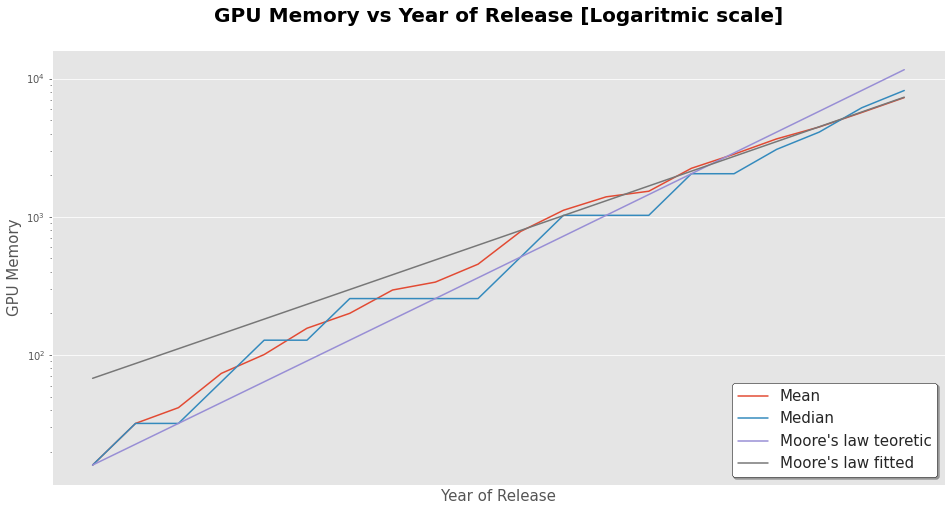

In [ ]:
plt.figure()
plt.figure(figsize=(16,8))
plt.title('GPU Memory vs Year of Release [Logaritmic scale]', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Year of Release', fontsize=15)
plt.ylabel('GPU Memory', fontsize=15)
sns.set_style("whitegrid")

plt.loglog(year_arr, memory_arr_mean, label="Mean", basex= 2)
plt.loglog(year_arr, memory_arr_median, label="Median", basex= 2)
plt.loglog(year_arr, y_pred_moore_law_teoretic, label="Moore's law teoretic", basex= 2)
plt.loglog(year_arr, y_pred_moore_law_fitted, label="Moore's law fitted", basex= 2)
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

# **Polynomial model**

**Build model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Fitting Polynomial Regression to the dataset
poly_reg_2 = PolynomialFeatures(degree = 2, include_bias=False)
poly_reg_3 = PolynomialFeatures(degree = 3, include_bias=False)

X_poly_2 = poly_reg_2.fit_transform(year_arr.reshape(-1, 1))
X_poly_3 = poly_reg_3.fit_transform(year_arr.reshape(-1, 1))

lin_reg_2 = LinearRegression()
lin_reg_3 = LinearRegression()

In [ ]:
lin_reg_2.fit(X_poly_2, memory_arr_mean)
lin_reg_3.fit(X_poly_3, memory_arr_mean)

In [ ]:
y_pred_lin_reg_2 = lin_reg_2.predict(poly_reg_2.fit_transform(year_arr.reshape(-1, 1)))
y_pred_lin_reg_3 = lin_reg_3.predict(poly_reg_3.fit_transform(year_arr.reshape(-1, 1)))

**Print coefficients of 2 models**

poly_reg_2

In [ ]:
print(lin_reg_2.intercept_)

129705240.80510715


In [ ]:
print(lin_reg_2.coef_)

[-1.29530723e+05  3.23390634e+01]


In [ ]:
print(y_pred_lin_reg_2)

[ 526.35670683  254.87001072   48.0614415   -94.06900088 -171.52131638
 -184.29550503 -132.39156678  -15.80950171  165.45069027  411.38900909
  722.00545479 1097.30002734 1537.27272677 2041.92355305 2611.25250623
 3245.25958624 3943.94479313 4707.3081269  5535.34958751 6428.069175  ]


poly_reg_3

In [ ]:
print(lin_reg_3.intercept_)

-17128661108.085476


In [ ]:
print(lin_reg_3.coef_)

[ 2.56615577e+07 -1.28150909e+04  2.13323868e+00]


In [ ]:
print(y_pred_lin_reg_3)

[ -93.77612686   26.39983368  102.45875549  147.20005035  173.42317581
  193.92754364  221.51260376  268.97776604  349.12248421  474.74617577
  658.6482811   913.62822914 1252.48545647 1688.01938438 2233.02945328
 2900.31508827 3702.67573738 4652.91081429 5763.81976128 7048.20200348]


Moore values

In [ ]:
print(y_pred_moore_law_teoretic)

[   16.            22.627417      32.            45.254834
    64.            90.50966799   128.           181.01933598
   256.           362.03867197   512.           724.07734394
  1024.          1448.15468787  2048.          2896.30937574
  4096.          5792.61875148  8192.         11585.23750296]


In [ ]:
print(y_pred_moore_law_fitted)

[  67.84120125   86.79955638  111.05586059  142.090636    181.79813954
  232.60198187  297.60305638  380.7688071   487.17538799  623.31749408
  797.5047755  1020.36903021 1305.51313269 1670.3413071  2137.1214217
 2734.34414374 3498.46191258 4476.11387243 5726.97256669 7327.38614664]


**Graph**

In [ ]:
trace1 = go.Scatter(
    x = year_arr,
    y = y_pred_lin_reg_2,
    mode = 'lines',
    name = '2nd degree polynomial'
)
trace2 = go.Scatter(
    x = year_arr,
    y = y_pred_lin_reg_3,
    mode = 'lines',
    name = '3rd degree polynomial'
)
trace3 = go.Scatter(
    x = year_arr,
    y = y_pred_moore_law_teoretic,
    mode = 'lines',
    name = "Teoretic Moore's Law curve"
)
trace4 = go.Scatter(
    x = year_arr,
    y = y_pred_moore_law_fitted,
    mode = 'lines',
    name = "Fitted Moore's Law curve"
)

data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Fitting regression model into dataset',
    width=1000,
    height=500,
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    yaxis = dict(title= 'GPU Memory'),
    xaxis = dict(title= 'Year of Release'),
    legend=dict(
        x=0,
        y=1,
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=12,
            color='#000'
        ),
        bgcolor='#E2E2E2',
        bordercolor='#FFFFFF',
        borderwidth=2
    )
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)